In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scvelo as scv

scv.settings.set_figure_params('scvelo', facecolor='white', dpi=100, frameon=False)

In [2]:
# load matrix
X = io.mmread("/share/crsp/lab/dalawson/tzhuravl/CellPlex_Tumors/Seurat/epi.integrated.counts.mtx")

# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

# load metadata
cell_meta = pd.read_csv("/share/crsp/lab/dalawson/tzhuravl/CellPlex_Tumors/Seurat/epi.integrated.metadata.csv", low_memory=False)

# load gene names
with open("/share/crsp/lab/dalawson/tzhuravl/CellPlex_Tumors/Seurat/epi.integrated.gene.names.csv", 'r') as f:
    gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

# load PCA dimensional reduction
pca = pd.read_csv("/share/crsp/lab/dalawson/tzhuravl/CellPlex_Tumors/Seurat/epi.integrated.pca.csv")
pca.index = adata.obs.index

# set pca and umap for the anndata object
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

... storing 'orig.ident' as categorical
... storing 'Cell.type' as categorical
... storing 'tissue' as categorical
... storing 'lumsec_cellstate_predicted' as categorical
... storing 'lumsec_celltype_predicted' as categorical
... storing 'tumor_cellstate_predicted' as categorical
... storing 'tumor_celltype_predicted' as categorical
... storing 'Phase' as categorical
... storing 'celltypes' as categorical


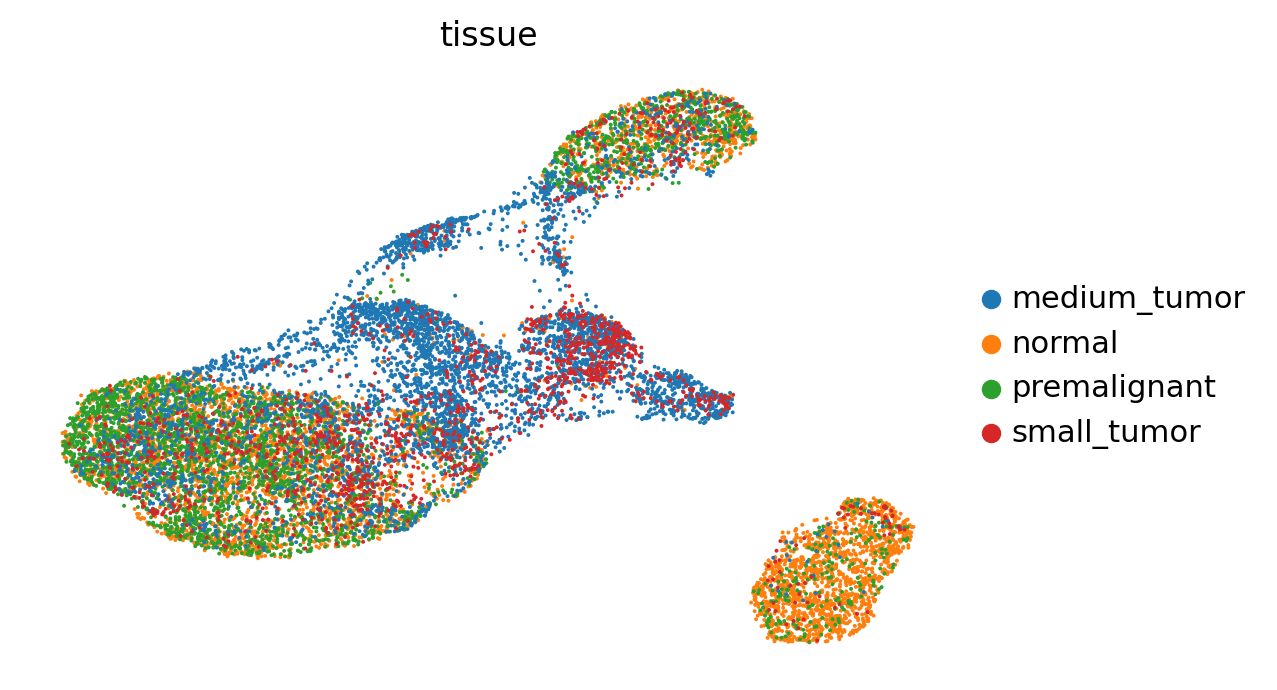

In [3]:
# plot the UMAP colored by cluster to test:
sc.pl.umap(adata, color=['tissue'], frameon=False)

In [4]:
adata.obs.index.name = "cells"

In [6]:
# save
adata.write('epi.integrated.h5ad')

In [7]:
loom1 = scv.read('looms/nMFP_1.loom', cache=True)
loom2 = scv.read('looms/nMFP_2.loom', cache=True)
loom3 = scv.read('looms/nMFP_3.loom', cache=True)
loom4 = scv.read('looms/nMFP_4.loom', cache=True)
loom5 = scv.read('looms/nMFP_5.loom', cache=True)
loom6 = scv.read('looms/pMFP_1.loom', cache=True)
loom7 = scv.read('looms/pMFP_2.loom', cache=True)
loom8 = scv.read('looms/pMFP_3.loom', cache=True)
loom9 = scv.read('looms/pMFP_4.loom', cache=True)
loom10 = scv.read('looms/pMFP_5.loom', cache=True)
loom11 = scv.read('looms/tum_599.loom', cache=True)
loom12 = scv.read('looms/tum_633.loom', cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
loom1.var_names_make_unique()
loom2.var_names_make_unique()
loom3.var_names_make_unique()
loom4.var_names_make_unique()
loom5.var_names_make_unique()
loom6.var_names_make_unique()
loom7.var_names_make_unique()
loom8.var_names_make_unique()
loom9.var_names_make_unique()
loom10.var_names_make_unique()
loom11.var_names_make_unique()
loom12.var_names_make_unique()

In [9]:
loom12.obs

""
CellID
sample_alignments_DO6MY:AAAGTGAAGGTAAGGAx
sample_alignments_DO6MY:AAAGGATAGAGTCAATx
sample_alignments_DO6MY:AAAGTGAGTAGTATAGx
sample_alignments_DO6MY:AACACACGTACAGAGCx
sample_alignments_DO6MY:AAAGTCCGTGGAAATTx
...
sample_alignments_DO6MY:TTTGTTGGTCTACAACx
sample_alignments_DO6MY:TTTGTTGTCTCTCCGAx
sample_alignments_DO6MY:TTTGTTGCACTACCCTx


In [10]:
# make barcodes match between adata and loom file
barcodes = [bc.replace('sample_alignments_6TEGI:',"") for bc in loom1.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_1") for bc in barcodes]
loom1.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_KGQQ3:',"") for bc in loom2.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_2") for bc in barcodes]
loom2.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_71LH2:',"") for bc in loom3.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_3") for bc in barcodes]
loom3.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_WYMFN:',"") for bc in loom4.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_4") for bc in barcodes]
loom4.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_NE6LU:',"") for bc in loom5.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_5") for bc in barcodes]
loom5.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_UT192:',"") for bc in loom6.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_6") for bc in barcodes]
loom6.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_MYFEH:',"") for bc in loom7.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_7") for bc in barcodes]
loom7.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_VA3SM:',"") for bc in loom8.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_8") for bc in barcodes]
loom8.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_Q21H9:',"") for bc in loom9.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_9") for bc in barcodes]
loom9.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_OTYVE:',"") for bc in loom10.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_10") for bc in barcodes]
loom10.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_58WNY:',"") for bc in loom11.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_1") for bc in barcodes]
loom11.obs.index = barcodes

barcodes = [bc.replace('sample_alignments_DO6MY:',"") for bc in loom12.obs.index.tolist()]
barcodes = [bc.replace('x',"-1_2") for bc in barcodes]
loom12.obs.index = barcodes

In [11]:
loom12.obs

""
AAAGTGAAGGTAAGGA-1_2
AAAGGATAGAGTCAAT-1_2
AAAGTGAGTAGTATAG-1_2
AACACACGTACAGAGC-1_2
AAAGTCCGTGGAAATT-1_2
...
TTTGTTGGTCTACAAC-1_2
TTTGTTGTCTCTCCGA-1_2
TTTGTTGCACTACCCT-1_2
TTTGTTGAGTAAGGGA-1_2


In [12]:
# when there are more than one loom files, combine them:
ldata = loom1.concatenate([loom2,loom3,loom4,loom5,loom6,loom7,loom8,loom9,loom10,loom11,loom12])

In [13]:
# merge the loom into adata
adata = scv.utils.merge(adata, ldata)

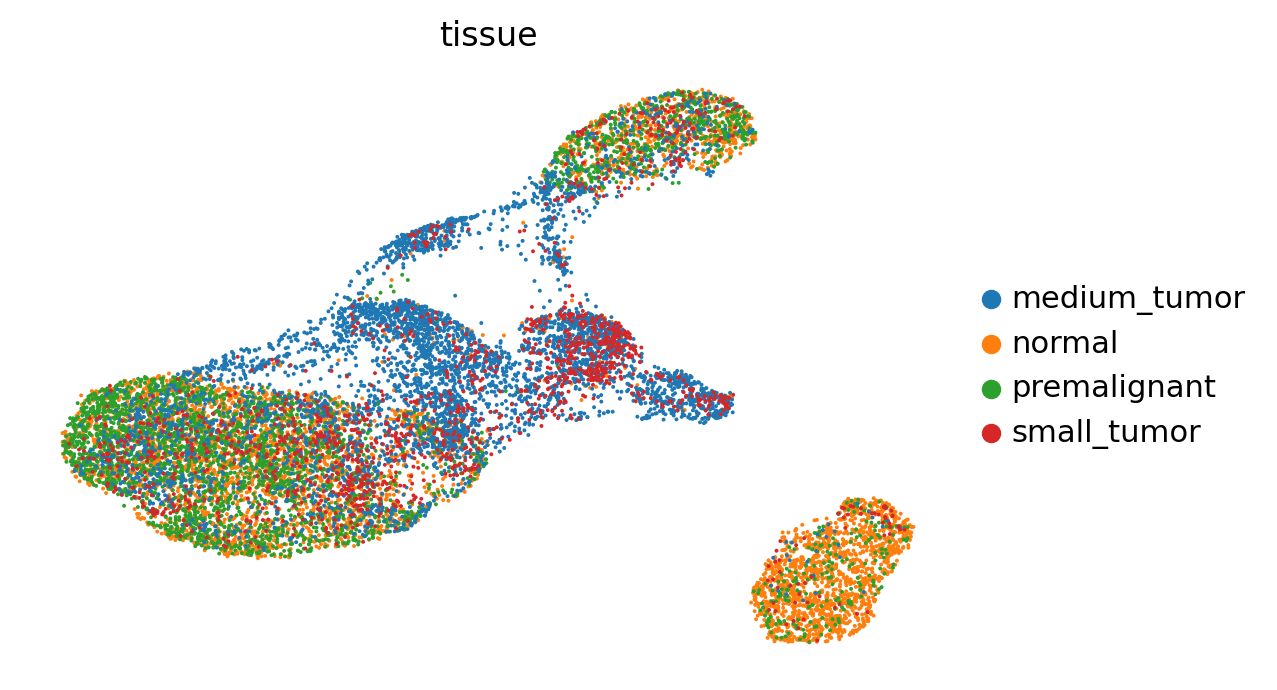

AnnData object with n_obs × n_vars = 14995 × 24258
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'Cell.type', 'tissue', 'integrated_snn_res.0.3', 'barcode', 'UMAP_1', 'UMAP_2', 'lumsec_cellstate_predicted', 'lumsec_celltype_predicted', 'tumor_cellstate_predicted', 'tumor_celltype_predicted', 'integrated_snn_res.0.2', 'integrated_snn_res.0.15', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'sample_batch', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [14]:
#confirm again
sc.pl.umap(adata, color='tissue', frameon=False)
adata

In [15]:
# save
adata.write('epi_integrated_scvelo.h5ad')

# reload later
#adata = sc.read_h5ad('epi_integrated_scvelo.h5ad')

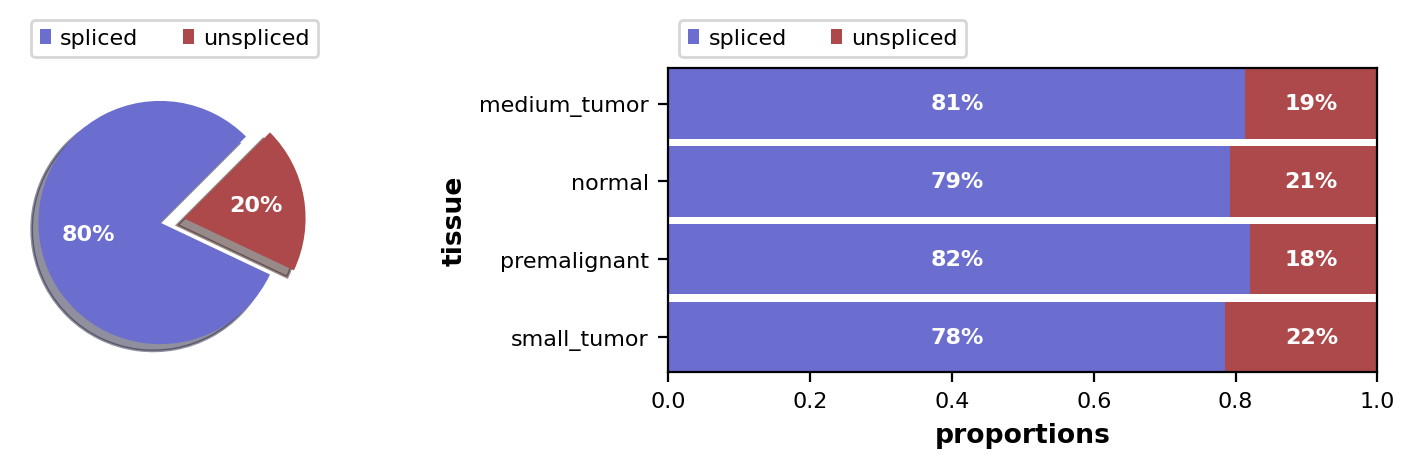

In [16]:
scv.pl.proportions(adata, groupby='tissue')

In [17]:
# do stochastic part first
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:45) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:20) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:32) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:03:56) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


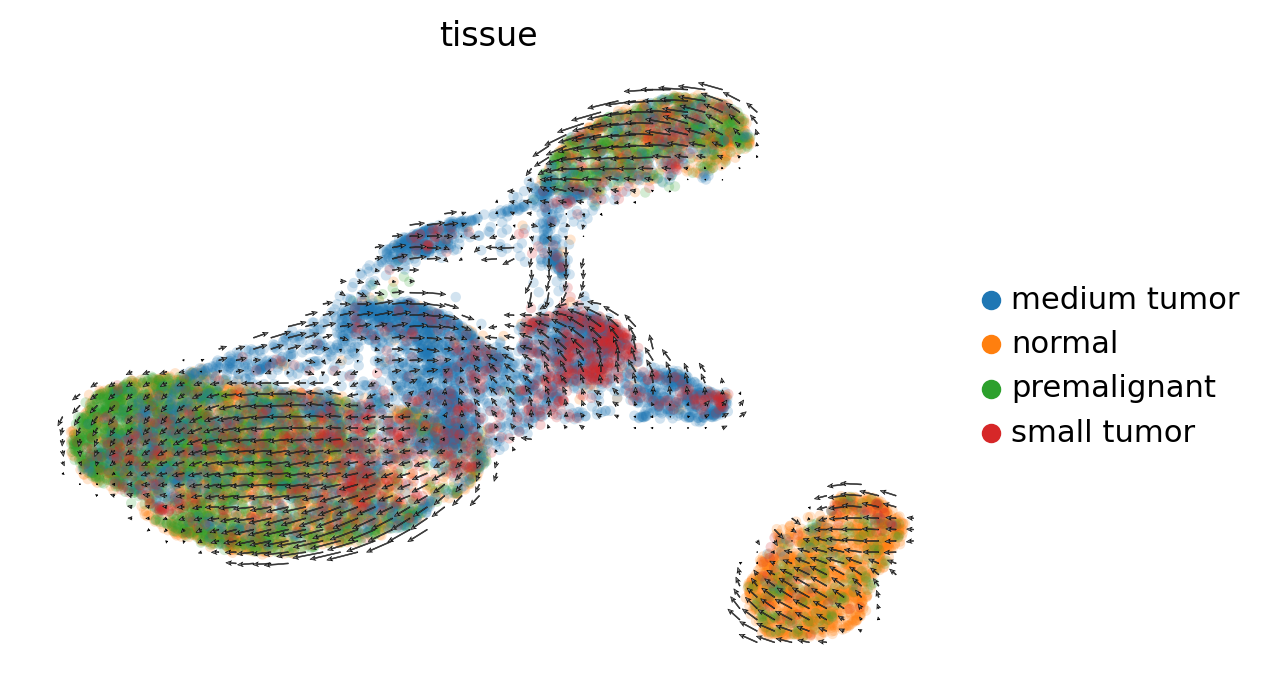

In [18]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='tissue', scale=0.25, legend_loc="right margin")

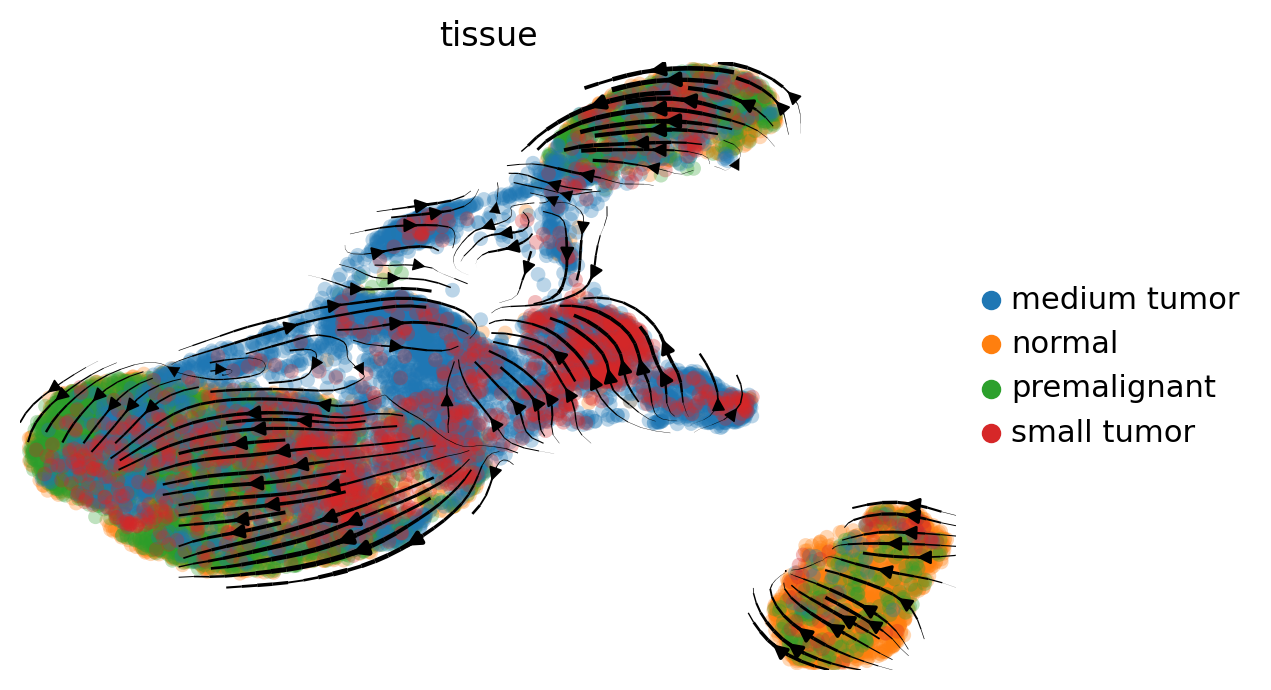

In [19]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['tissue'], legend_loc="right margin")

## For the rest of analysis, color the UMAPs by celltypes